In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

from helpers import evaluate_experiments, _fdc, _boxplot, _scatter


import xarray as xr
from neuralhydrology.evaluation.metrics import calculate_all_metrics, nse
from datetime import datetime, timedelta

def days_since_to_datetime(days_since, reference_time):
    try:
        reference_datetime = datetime.strptime(reference_time, "%d-%b-%Y")
    except:
        reference_datetime = datetime.strptime(reference_time, "%Y-%M-%d")
    return reference_datetime + timedelta(days=days_since)

def convert_date_time(ds, reference_time):
    #reference_time = ds.time.attrs['units'].split()[2]
    datetime_values = [days_since_to_datetime(int(days_since), reference_time) for days_since in ds.time]
    ds['time'] = datetime_values
    return ds
    

def open_exp(exp):    
    ds_list = []
    for sim_path in [base_path / p for p in exp]:
        ds = xr.open_dataset(sim_path, decode_times=False)
        refrence_time = ds.time.attrs['units'].split()[2]
        ds_list.append(convert_date_time(ds, refrence_time))
    
    ds = xr.concat(ds_list, dim='time')
    return ds    

def align(a, b):
    a = a.sel(time=b['time'], method='nearest', tolerance=8.64e+13) # 1day = 8.64e+13ns
    b = b.sel(time=a['time'], method='nearest', tolerance=8.64e+13)
    a['time'] = b['time']
    return a,b

catchment_mapping = '/Users/sho108/Desktop/x/Projects/MDBSY2/Work/Modelling/Metadata/location_boundary_area.csv'
obs_path = Path('/Users/sho108/Desktop/x/Projects/MDBSY2/Work/Modelling/Data/CAMELS_AUS_streamflow_m3s_reduced_gauges.nc')
base_path = Path('/Users/sho108/Desktop/x/Projects/MDBSY2/Work/Modelling/Sim')

gr4j_experiments= {
    'ssxv_s':['GR4_sim_SSXV_19810101-19951231_SILOprecip_cal_NSE_20000101-20141231_SILOprecip.nc', 'GR4_sim_SSXV_20000101-20141231_SILOprecip_cal_NSE_19810101-19951231_SILOprecip.nc'],
    'ssxv_a':['GR4_sim_SSXV_19810101-19951231_AWAPprecip_cal_NSE_20000101-20141231_AWAPprecip.nc', 'GR4_sim_SSXV_20000101-20141231_AWAPprecip_cal_NSE_19810101-19951231_AWAPprecip.nc'],
    'nn_s':['GR4_sim_NNXV_19810101-20141231_SILOprecip_cal_NSE_19810101-20141231_SILOprecip.nc'],
    'nn_a':['GR4_sim_NNXV_19810101-20141231_AWAPprecip_cal_NSE_19810101-20141231_AWAPprecip.nc'],

}

ds_obs = convert_date_time(xr.open_dataset(obs_path,decode_times=False), '31-Dec-1950')
gr4j_metric_list = []
for k, exp in gr4j_experiments.items():
    ds = open_exp(exp)
    
    a,b = align(ds_obs['q_obs'].isel(ens_member=0, lead_time=0), ds['q_sim'].isel(ens_member=0, lead_time=0))
    a=a.rename({'time':'date'})
    b=b.rename({'time':'date'})
    metrics_dict = {int(station): nse(a.sel(station=station),b.sel(station=station)) for station in a.station}
    df_gr4j_metrics = pd.DataFrame.from_dict(metrics_dict, orient='index')    
    station_ids = pd.read_csv(catchment_mapping)['station_id']
    df_gr4j_metrics.index = station_ids
    df_gr4j_metrics.columns = [k]
    gr4j_metric_list.append(df_gr4j_metrics)

    

gr4j_metics = pd.concat(gr4j_metric_list, axis=1)

In [2]:
base_path = Path('/Users/sho108/Desktop/r/work/sho108/neuralhydrology_workflow/runs')
# test

exps = [
    {'pattern': 'spatial_twofold_{fold:d}_Pra__*', 'name': 'spatial_PraEts', 'method': 'spatial'},
    {'pattern': 'temporal_twofold_{fold:d}_Pra__*', 'name': 'temporal_PraEts', 'method': 'temporal'},
    ]

exps = [
    {'pattern': 'spatial_37foldsplit_{fold:d}_PrsEts_PmePetHpdLpd_*', 'name': 'spatial_PraEts', 'method': 'spatial'},

]
lstm_metrics = evaluate_experiments(exps, base_path=base_path, folds=36)

{'pattern': 'spatial_37foldsplit_{fold:d}_PrsEts_PmePetHpdLpd_*', 'name': 'spatial_PraEts', 'method': 'spatial'}
spatial_37foldsplit_0_PrsEts_PmePetHpdLpd_*
Loading results for each run.


100%|██████████| 1/1 [00:00<00:00, 432.71it/s]


Combining results and calculating metrics.


100%|██████████| 6/6 [00:00<00:00, 112.20it/s]

spatial_37foldsplit_1_PrsEts_PmePetHpdLpd_*


Loading results for each run.


100%|██████████| 1/1 [00:00<00:00, 503.52it/s]


Combining results and calculating metrics.


100%|██████████| 6/6 [00:00<00:00, 108.30it/s]

spatial_37foldsplit_2_PrsEts_PmePetHpdLpd_*


Loading results for each run.


100%|██████████| 1/1 [00:00<00:00, 495.25it/s]


Combining results and calculating metrics.


100%|██████████| 6/6 [00:00<00:00, 110.86it/s]

spatial_37foldsplit_3_PrsEts_PmePetHpdLpd_*


Loading results for each run.


100%|██████████| 1/1 [00:00<00:00, 442.06it/s]


Combining results and calculating metrics.


100%|██████████| 6/6 [00:00<00:00, 105.72it/s]

spatial_37foldsplit_4_PrsEts_PmePetHpdLpd_*


Loading results for each run.


100%|██████████| 1/1 [00:00<00:00, 100.56it/s]


Combining results and calculating metrics.


100%|██████████| 6/6 [00:00<00:00, 95.04it/s]

spatial_37foldsplit_5_PrsEts_PmePetHpdLpd_*


Loading results for each run.


100%|██████████| 1/1 [00:00<00:00, 426.60it/s]


Combining results and calculating metrics.


100%|██████████| 6/6 [00:00<00:00, 111.70it/s]

spatial_37foldsplit_6_PrsEts_PmePetHpdLpd_*


Loading results for each run.


100%|██████████| 1/1 [00:00<00:00, 319.18it/s]


Combining results and calculating metrics.


100%|██████████| 6/6 [00:00<00:00, 99.44it/s]

spatial_37foldsplit_7_PrsEts_PmePetHpdLpd_*


Loading results for each run.


100%|██████████| 1/1 [00:00<00:00, 361.83it/s]


Combining results and calculating metrics.


100%|██████████| 6/6 [00:00<00:00, 105.07it/s]

spatial_37foldsplit_8_PrsEts_PmePetHpdLpd_*


Loading results for each run.


100%|██████████| 1/1 [00:00<00:00, 387.14it/s]


Combining results and calculating metrics.


100%|██████████| 6/6 [00:00<00:00, 106.97it/s]

spatial_37foldsplit_9_PrsEts_PmePetHpdLpd_*


spatial_37foldsplit_10_PrsEts_PmePetHpdLpd_*
Loading results for each run.


100%|██████████| 1/1 [00:00<00:00, 400.53it/s]


Combining results and calculating metrics.


100%|██████████| 6/6 [00:00<00:00, 109.93it/s]

spatial_37foldsplit_11_PrsEts_PmePetHpdLpd_*


Loading results for each run.


100%|██████████| 1/1 [00:00<00:00, 471.01it/s]


Combining results and calculating metrics.


100%|██████████| 6/6 [00:00<00:00, 108.77it/s]

spatial_37foldsplit_12_PrsEts_PmePetHpdLpd_*


spatial_37foldsplit_13_PrsEts_PmePetHpdLpd_*


IndexError: list index out of range

In [184]:
lstm_metrics

""


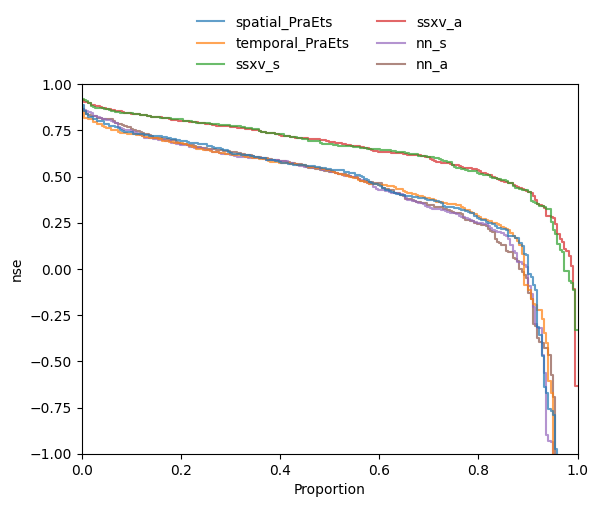

<Figure size 1500x500 with 0 Axes>

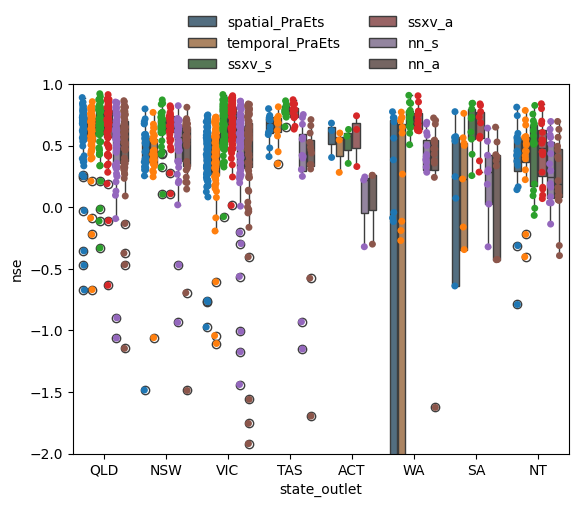

<Figure size 1500x500 with 0 Axes>

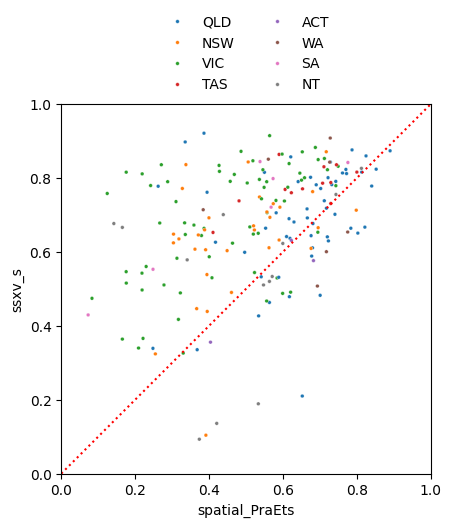

In [164]:
df = pd.concat([lstm_metrics, gr4j_metics ], axis=1).dropna()
_fdc(df)
_boxplot(df)
_scatter(df, x='spatial_PraEts', y=df.columns[2])

1      0.281625
2      0.081068
3      0.515235
4      0.642215
5      0.523650
         ...   
217    0.863722
218    0.835665
219    0.863424
220    0.784321
221    0.788517
Name: NSE, Length: 221, dtype: float64